# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [6]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pickle
import csv
import cv2
from sklearn.utils import shuffle
import random
from tensorflow.contrib.layers import flatten

%matplotlib inline


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [8]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test =  X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

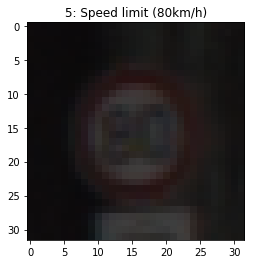

In [54]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

def signnames_r(filename):
    '''opens a csv file with 2 rosw and return a dictionary '''
    output={}
    with open(filename, 'r') as csvfile:
        #signreader = csv.DictReader(csvfile)
        signreader = csv.reader(csvfile, delimiter=',')
        for row in signreader:
            print(row)
            output[row[0]] = row[1]
    return output

def plot_rnd_sign(X_train,y_train, signnames):
    '''plot an random sign'''
    random_index = random.randint(0, len(X_train))        
    img = X_train[random_index] 
    label = y_train[random_index]
    signname_plt=signnames[str(label)]
    #print(signname_plt)
    plt.figure(figsize=(4,4))
    plt.title(str(label)+": "+signname_plt)
    plt.imshow(img)

#signnames=signnames_r('signnames.csv')
plot_rnd_sign(X_train,y_train, signnames)

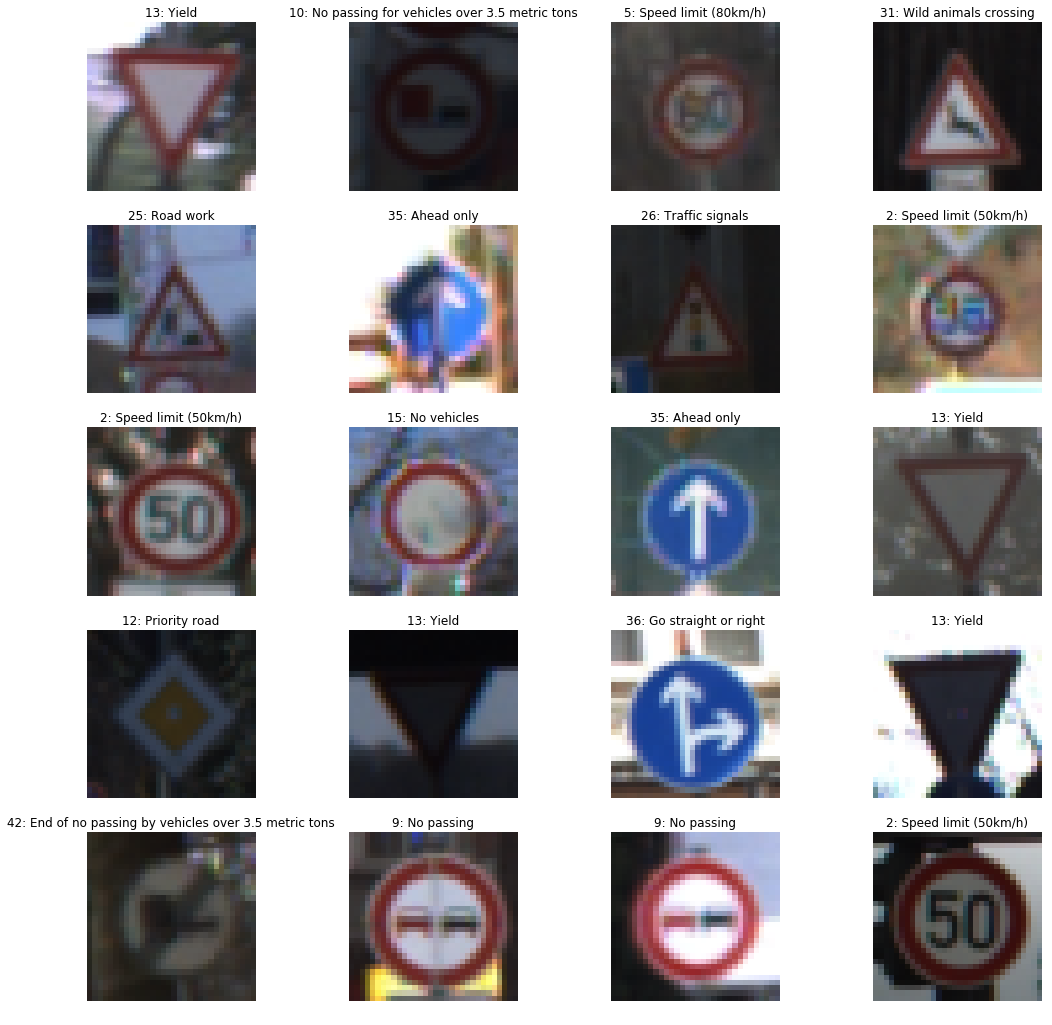

In [10]:
def plot_rnd_sign_multi(X_train,y_train, signnames, no_signs=20, columns=4, cmap=''):
    '''plot no_sings of random signs'''
    rows = int(no_signs/columns+0.5)
    fig = plt.figure(figsize=(18,18));
    
    for i in range(1, no_signs+1):
        random_index = random.randint(0, len(X_train))        
        img = X_train[random_index] 
        label = y_train[random_index]
        signname_plt=signnames[str(label)]
        
        fig.add_subplot(rows, columns, i)
        plt.title(str(label)+": "+signname_plt)
        plt.axis('off')
        if cmap != '':
            plt.imshow(img, cmap=cmap)
        else:
            plt.imshow(img)
        
    plt.show()
  
plot_rnd_sign_multi(X_train,y_train, signnames, no_signs=20, columns=4)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Pre-process: Normalization
A neural network learn its weights by coninusly adding gradient error vectors ((multiplied by a learning rate) computed from backpropagation to various weight matrices throughout the network as training examples are run.

If we did not scale our input training vectors, the ranges of our distributions of feature values would likely be different for each feature, and therefore the learning rate in each dimension would produce corrections that would be (proportionally) different from each other. We might overcompensate for a correction in one weight dimension while undercompensating in another.

So let's divide by the standard deviation of each feature (pixel). Subtracting the mean will center the input at 0, and dividing by the standard deviation will make the number of standard deviations away from the mean a scaled feature value.

In [11]:
def normalization(X_train):
    '''So let's divide by the standard deviation of each feature (pixel).
    Subtracting the mean will center the input at 0, and dividing by the standard deviation will 
    make the number of standard deviations away from the mean a scaled feature value.'''
    output = (X_train - np.mean(X_train ))/ np.std(X_train )
    return output

### Pre-process: Gray-Scale
As can be seen in the image examples above, the colors have no significant information. Each sign can be recognized even without color. Grayscale reduces the information, makes the NN smaller and more agile. 

In [12]:
def grayscale(X_train):
    '''Grayscale reduces the information, makes the NN smaller and more agile. '''
    output = cv2.cvtColor(X_train, cv2.COLOR_RGB2GRAY)
    return output

#### Pre-process: Test first result

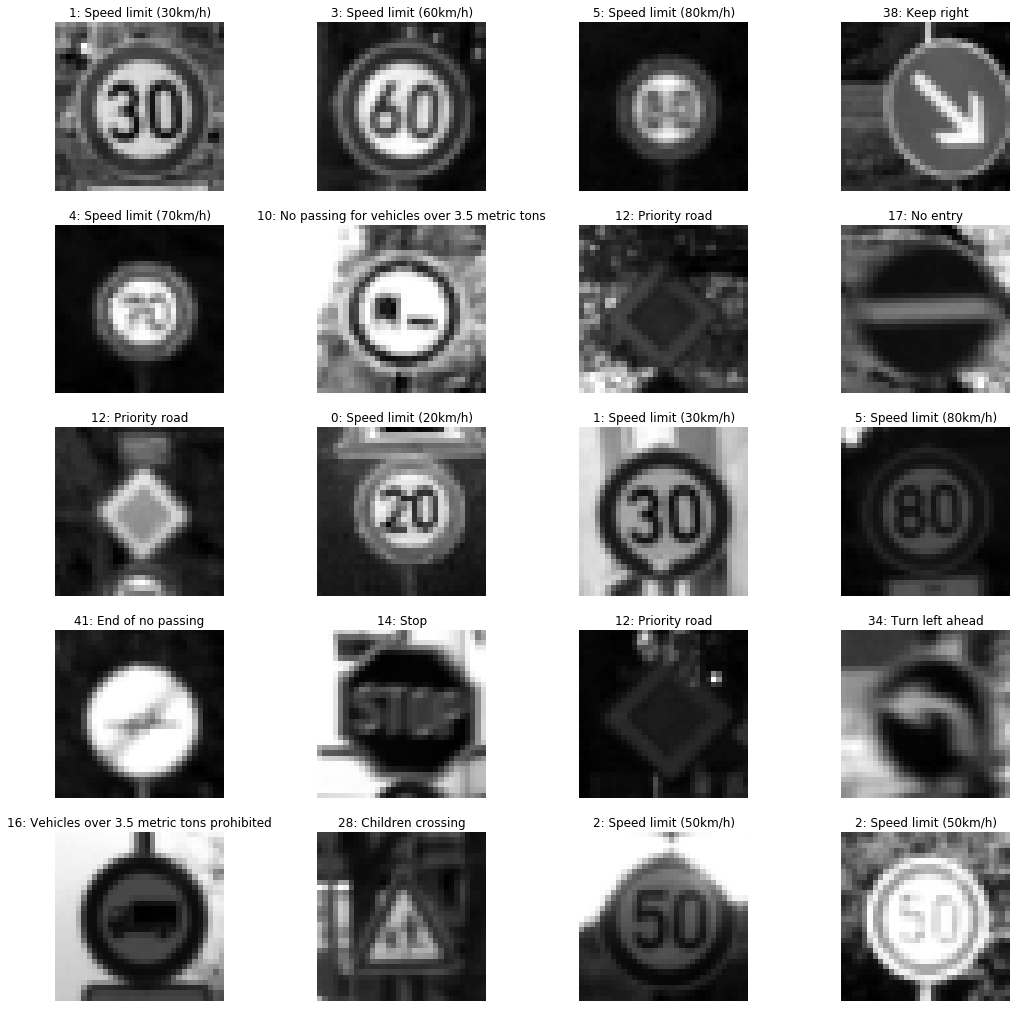

In [13]:
def pre_process_first(X_train):
    X_train_gray = list(map(grayscale, X_train))
    X_train_norm = list(map(normalization, X_train_gray))
    return X_train_norm

X_train_prepro_first = pre_process_first(X_train)
plot_rnd_sign_multi(X_train_prepro_first,y_train, signnames, no_signs=20, columns=4, cmap='gray')

We can see, that the brightness and the contrast of the images have different values. So variable contrast and brightness could be information that misslead the NN and lowers the accuracy. 

To equalize the cntrast and the brightness, I'll use the CLAHE (Contrast Limited Adaptive Histogram Equalization) from this source: https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html)
### Pre-Processing: CLAHE
information from link above:
"...In this, image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied."

In [14]:
def clahe(X_train):
    '''histogramm equalization useing the function CLAHE '''
    clahe  = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    X_train_clahe = clahe.apply(X_train)
    return X_train_clahe

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


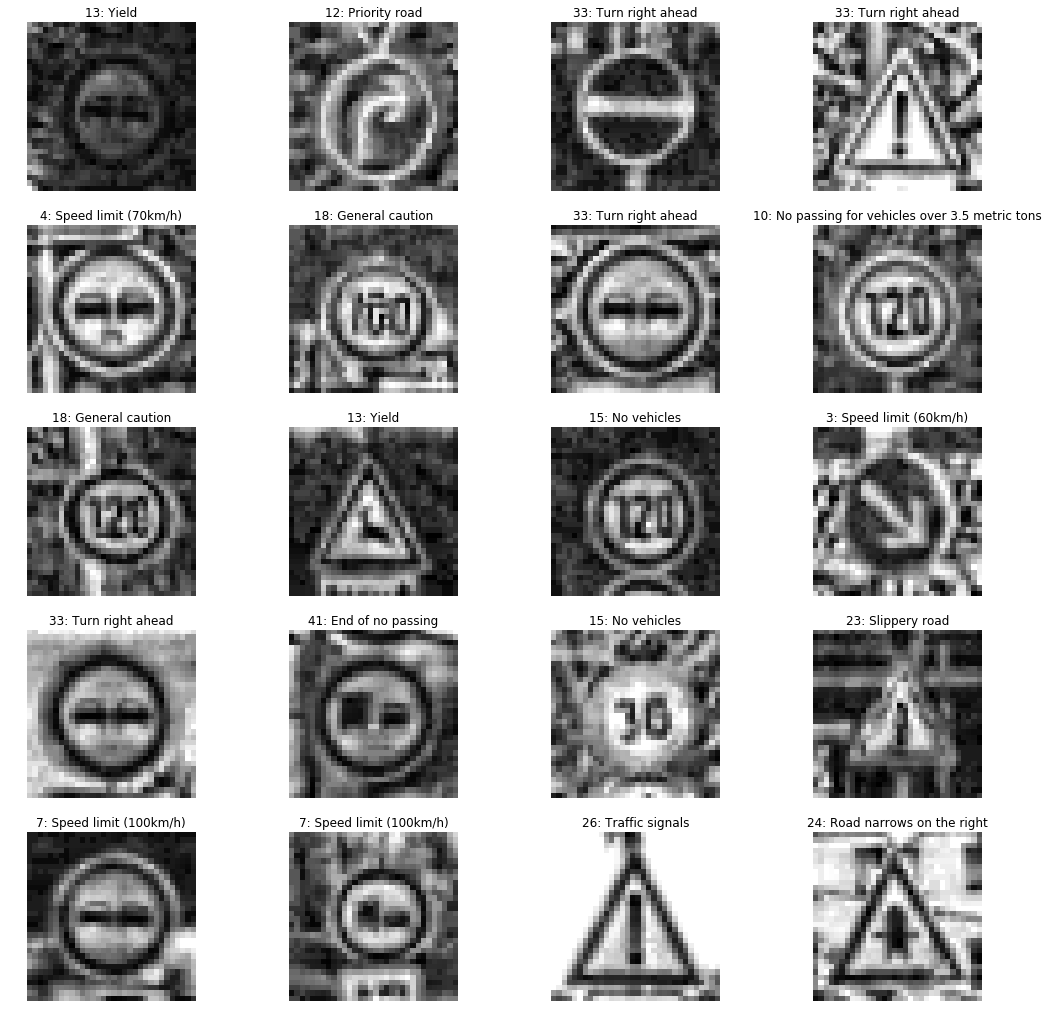

In [15]:
def pre_process(X_train, y_train):
    X_train_gray = list(map(grayscale, X_train))
    X_train_clahe = list(map(clahe, X_train_gray))
    X_train_norm = list(map(normalization, X_train_clahe))
    #X_train_prepro, y_train_prepro = shuffle(X_train_norm, y_train)
    
    if y_train == 'None':
        y_train_prepro = 'None'
        X_train_prepro = X_train_norm
    else:
        X_train_prepro, y_train_prepro = shuffle(X_train_norm, y_train)
        
    return X_train_prepro, y_train_prepro

X_train_prepro, y_train_prepro = pre_process(X_train, y_train)
X_valid, y_valid = pre_process(X_valid, y_valid)
X_test, y_test = pre_process(X_test, y_test)
plot_rnd_sign_multi(X_train_prepro,y_train, signnames, no_signs=20, columns=4, cmap='gray')

Pre-processed images with normalization, grayscale and histogram equalization look good. 
Now it's time for the NN model architecture.


### Model Architecture
To improve the performance of the NN I made this changes to the standard LeNet architecture:
- Initialisation with Xavier Glorot and Yoshua Bengio (2010)
- Dropout like learned in the course

### Initialization with Xavier
Xavier Glorot and Yoshua Bengio showed in "Understanding the difficulty of training deep feedforward neural networks" in 2010 that neural networks with a "default" initialization showed much larger differences in the variance of individual parameters in the first layers than in the last. 
In addition, their research showed that neural networks initialized according to their specifications converged significantly faster and with greater accuracy.
Xavier's initialization sets the parameter values of a layer to random values from a normal distribution with the following interval:

+/−√6/√(ni+ni+1)

Where ni is the number of incoming nodes into a layer and ni+1 is the number of outgoing nodes.

Glorot and Bengio were convinced that this initialization of parameters would keep the variance of individual activations and gradients constant across all layers during the back-propagation process. They proved this with an investigation of a neural network with 5 layers.
(Source: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf,
Source: https://www.kuenstliche-intelligenz-in-a-nutshell.at/2020/04/04/xavier-initialization-neural-nets.html)

In [16]:
initializer_xavier = tf.contrib.layers.xavier_initializer()

### Initialization with Kaiming 
Kaiming He, et al. in their 2015 paper titled “Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification” suggested that Xavier initialization and other schemes were not appropriate for ReLU and extensions.
They proposed a small modification of Xavier initialization to make it suitable for use with ReLU, now commonly referred to as “Kaiming initialization” (specifically +/- sqrt(2/n) where n is the number of nodes in the prior layer known as the fan-in). In practice, both Gaussian and uniform versions of the scheme can be used. (Source: https://medium.com/ai%C2%B3-theory-practice-business/the-rectified-linear-unit-relu-and-kaiming-initialization-4c7a981dfd21)

Because I'm planing to use ReLU, I choose the Kaiming Iniialization
##### (because the Udacity version of tensorflow 1.x doesn't support Keras, the Kaiming Initialization is not part of these version of my submited project)

In [17]:
### because these version of tensorflow 1.x doesn't support Keras, the Kaiming Initialization is not part of these version of my project
#import keras
#initializer_kaiming = tf.keras.initializers.he_normal()
#from tensorflow.initializers import he_normal
#initializer_kaiming= tf.initializers.he_normal()

### LeNet Architecture


My final LeNET model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 RGB image   							| 
| Convolution (5,5,1,6)     	| 1x1 stride, same padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6 				|
| Dropout | |
| Convolution (5, 5, 6, 16)	    | 1x1 stride, same padding, outputs 10x10x16     									|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16 				|
| Dropout | |
| Flatten | Input = 5x5x16. Output = 400|
| Fully connected 1		| Input = 400. Output = 120        									|
| RELU				|         									|
|			dropout			|												|
|		Fully connected 2				|		Input = 120. Output = 84										|
| RELU | |
| Dropout | |
| Fully connected 3 | Input = 84. Output = n_classes |


In [18]:
### Define your architecture here.
### Feel free to use as many code cells as needed.



def LeNet(x, use_xavier=False, use_kaiming=False, use_dropout=False):    
    '''
    standard LeNet Architecture. Changes:
    use_xavier = True: instead of standard Initialization use Xavier Initialization
    use_dropout = True: use dropout
    '''
    
    # For standard Initialization. Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0 
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    #out_height = ceil(float(in_height - filter_height + 1) / float(strides[1])) 
    # tartget: 28 --> filter_height = 5
    shape = (5,5,1,6) # Filter (height, width, input_depth, output_depth)
    strides= [1,1,1,1]
    if use_xavier:
        wc1 = tf.Variable(initializer_xavier(shape=shape))
    #elif use_kaiming:
    #    wc1=tf.Variable(initializer_kaiming(shape=shape))
    else:
        wc1=tf.Variable(initializer_truncated(shape=shape, mean = mu, stddev = sigma))
    
    bc1=tf.Variable(tf.zeros(6))
    x_conv1=tf.nn.conv2d(x, wc1, strides=strides, padding='VALID')
    x_conv1= tf.nn.bias_add(x_conv1, bc1)

    # Activation.
    x_activ1=tf.nn.relu(x_conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    x_pool1=tf.nn.max_pool(x_activ1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    if use_dropout:
        x_pool1 = tf.nn.dropout(x_pool1, keep_prob)
    
    
    # Layer 2: Convolutional. Output = 10x10x16.
    shape = (5, 5, 6, 16) # Filter (height, width, input_depth, output_depth)
    strides= [1,1,1,1]
    if use_xavier:
        wc2 = tf.Variable(initializer_xavier(shape=shape))
    #elif use_kaiming:
    #    wc2=tf.Variable(initializer_kaiming(shape=shape))
    else:
        wc2=tf.Variable(initializer_truncated(shape=shape, mean = mu, stddev = sigma))
                          
    bc2=tf.Variable(tf.zeros(16))
    x_conv2=tf.nn.conv2d(x_pool1, wc2, strides=strides, padding='VALID')
    x_conv2= tf.nn.bias_add(x_conv2, bc2)
    
    # Activation.
    x_activ2=tf.nn.relu(x_conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    x_pool2=tf.nn.max_pool(x_activ2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    if use_dropout:
        x_pool2 = tf.nn.dropout(x_pool2, keep_prob)


    # Flatten. Input = 5x5x16. Output = 400.
    x_conv2f= flatten(x_pool2)
    #x_conv2f=tf.keras.layers.Flatten()(x_pool2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    shape = (400, 120) # Filter (height, width, input_depth, output_depth)
    if use_xavier:
        wc3 = tf.Variable(initializer_xavier(shape=shape))
    #elif use_kaiming:
       # wc3=tf.Variable(initializer_kaiming(shape=shape))
    else:
        wc3=tf.Variable(initializer_truncated(shape=shape, mean = mu, stddev = sigma))
                    
    bc3=tf.Variable(tf.zeros(120))
    x_fc3= tf.add(tf.matmul(x_conv2f, wc3), bc3)
    
    # Activation.
    x_fc3activ = tf.nn.relu(x_fc3)
    if use_dropout:
        x_fc3activ = tf.nn.dropout(x_fc3activ, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    shape = (120, 84) # Filter (height, width, input_depth, output_depth)
    if use_xavier:
        wc4 = tf.Variable(initializer_xavier(shape=shape))
    #elif use_kaiming:
     #   wc4=tf.Variable(initializer_kaiming(shape=shape))
    else:
        wc4=tf.Variable(initializer_truncated(shape=shape, mean = mu, stddev = sigma))
    
    bc4=tf.Variable(tf.zeros(84))
    x_fc4= tf.add(tf.matmul(x_fc3activ, wc4), bc4)
    
    # Activation.
    x_fc4activ = tf.nn.relu(x_fc4)
    if use_dropout:
        x_fc4activ = tf.nn.dropout(x_fc4activ, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    shape = (84, n_classes) # Filter (height, width, input_depth, output_depth)+
    if use_xavier:
        wc5 = tf.Variable(initializer_xavier(shape=shape))
    #elif use_kaiming:
    #    wc5=tf.Variable(initializer_kaiming(shape=shape))
    else:
        wc5=tf.Variable(initializer_truncated(shape=shape, mean = mu, stddev = sigma))
        
    bc5=tf.Variable(tf.zeros(n_classes))
    logits= tf.add(tf.matmul(x_fc4activ, wc5), bc5)
    
    
    global network_params
    network_params = {
        "conv1": x_activ1,
        "conv2": x_activ2,
        "fc1": x_fc3activ,
        "fc2": x_fc4activ,
        "logits": logits
    }
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Description of trained model


| parameter         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Epochs         		| 80. But after 40 epochs no improvement.  							| 
| Batch size | 128|
| learning rate | 0.0008 - good results by some testing|
| Optimizer | Adam Optimizer like in the LeNet Lab| 


In [19]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS = 80
BATCH_SIZE = 128
rate = 0.0008

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [20]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

### Training Pipeline
I use Adam optimizer (alternative would be the SGD) and cross entropy loss like in LeNET-Lab. <br>


In [21]:
#LeNet(x, use_xavier=False, use_kaiming=False, use_dropout=False):
logits = LeNet(x, True, False, True)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [22]:
# basicly same code like in the LeNet-Lab
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, prob=0):
    n_signs = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, n_signs, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        
        if prob > 0:
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
            loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
            
        else: #error catching if prob=0
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
            
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / n_signs, loss

### Train the Model

- Run the training data through the training pipeline to train the model.

- Before each epoch, shuffle the training set.

- After each epoch, measure the loss and accuracy of the validation set.

- Save the model after training.

In [23]:
global highest_accuracy
highest_accuracy= 0

train_accuracys = []
valid_accuracys = []
train_losses = []
valid_losses = []

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_loss = 0.0
    train_accuracy = 0.0
    
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_prepro[offset:end], y_train_prepro[offset:end]
            batch_x = np.reshape(batch_x, (-1, 32, 32, 1))
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.75})
            train_loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.75})
            train_accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.75})
            
            
        train_accuracys.append(train_accuracy)
        train_losses.append(train_loss)
        X_valid_reshaped = np.reshape(X_valid, (-1, 32, 32, 1))
        # for testing or validaton always set drop out = 1, for best accuracy
        validation_accuracy, validation_loss = evaluate(X_valid_reshaped, y_valid, prob=1.0)
        valid_accuracys.append(validation_accuracy)
        valid_losses.append(validation_loss)
        if validation_accuracy > highest_accuracy:
            highest_accuracy = validation_accuracy
            saver.save(sess, './lenet')
            print("Model saved")
        
        print("EPOCH {} ...".format(i+1))
        print("Training Loss: {:.4f}, Training Accuracy = {:.3f}".format(train_loss, train_accuracy * 100))
        print("Validation Loss: {:.4f}, Validation Accuracy = {:.3f}".format(validation_loss, validation_accuracy*100))
        print("highest  Validation Accuracy {:.3f} ...".format(highest_accuracy))
        print()
print("Training finished. Highest Validation Accuracy {:.3f} ...".format(highest_accuracy))

Training...

Model saved
EPOCH 1 ...
Training Loss: 1.1107, Training Accuracy = 67.568
Validation Loss: 0.7875, Validation Accuracy = 74.580
highest  Validation Accuracy 0.746 ...

Model saved
EPOCH 2 ...
Training Loss: 0.7394, Training Accuracy = 81.982
Validation Loss: 0.3183, Validation Accuracy = 86.689
highest  Validation Accuracy 0.867 ...

Model saved
EPOCH 3 ...
Training Loss: 0.6007, Training Accuracy = 80.180
Validation Loss: 0.2076, Validation Accuracy = 89.841
highest  Validation Accuracy 0.898 ...

Model saved
EPOCH 4 ...
Training Loss: 0.4745, Training Accuracy = 81.982
Validation Loss: 0.1391, Validation Accuracy = 90.884
highest  Validation Accuracy 0.909 ...

Model saved
EPOCH 5 ...
Training Loss: 0.4195, Training Accuracy = 88.288
Validation Loss: 0.0823, Validation Accuracy = 93.333
highest  Validation Accuracy 0.933 ...

Model saved
EPOCH 6 ...
Training Loss: 0.3703, Training Accuracy = 91.892
Validation Loss: 0.0694, Validation Accuracy = 94.014
highest  Validation

EPOCH 52 ...
Training Loss: 0.1878, Training Accuracy = 96.396
Validation Loss: 0.0097, Validation Accuracy = 96.961
highest  Validation Accuracy 0.977 ...

EPOCH 53 ...
Training Loss: 0.1819, Training Accuracy = 95.495
Validation Loss: 0.0057, Validation Accuracy = 97.098
highest  Validation Accuracy 0.977 ...

EPOCH 54 ...
Training Loss: 0.1133, Training Accuracy = 97.297
Validation Loss: 0.0049, Validation Accuracy = 97.166
highest  Validation Accuracy 0.977 ...

EPOCH 55 ...
Training Loss: 0.0903, Training Accuracy = 98.198
Validation Loss: 0.0057, Validation Accuracy = 96.531
highest  Validation Accuracy 0.977 ...

EPOCH 56 ...
Training Loss: 0.0735, Training Accuracy = 96.396
Validation Loss: 0.0055, Validation Accuracy = 96.893
highest  Validation Accuracy 0.977 ...

EPOCH 57 ...
Training Loss: 0.0964, Training Accuracy = 100.000
Validation Loss: 0.0037, Validation Accuracy = 97.302
highest  Validation Accuracy 0.977 ...

EPOCH 58 ...
Training Loss: 0.1067, Training Accuracy = 9

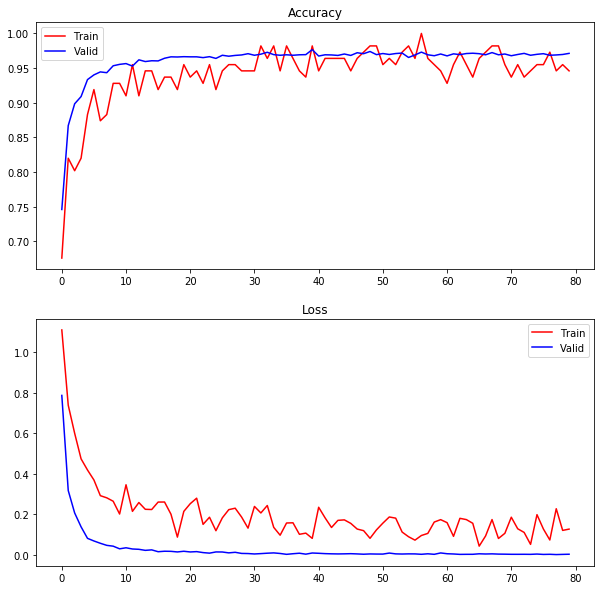

In [21]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(2, 1, 1)
plt.plot(train_accuracys, color='red', label='Train')
plt.plot(valid_accuracys, color='blue', label='Valid')
plt.title('Accuracy')
plt.legend(loc='best')

fig.add_subplot(2, 1, 2)
plt.plot(train_losses, color='red', label='Train')
plt.plot(valid_losses, color='blue', label='Valid')
plt.title('Loss')
plt.legend(loc='best')
plt.show()

#### Discussion of Results
The training was finished with ...

| Data         		|     highest accuracy	        					| 
|:---------------------:|:---------------------------------------------:| 
| Training         		| 100 %   							| 
| Validation   	| 97.7% 	|

The main reasons for the good results is...
- the pre processing of the training data.
- the initilization with Xavier
- useing dropout with keep probaility: 0.75 (lower values --> lower accuracy)

Because of the good results no changes in the NN architecture is required. 

My approach was to read some articles/lecture to image pre processing for receiving good results with NN. The architecture we already trained in LeNet-Lab was good enough for this task. To improve the accuracy of validation data I used the tools like dropout, we learned earlier. From there on it was trial an error to get the best values.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

[ 9  9 25 33 28 18 40 13 23  4 28 22 14  1 14 38]


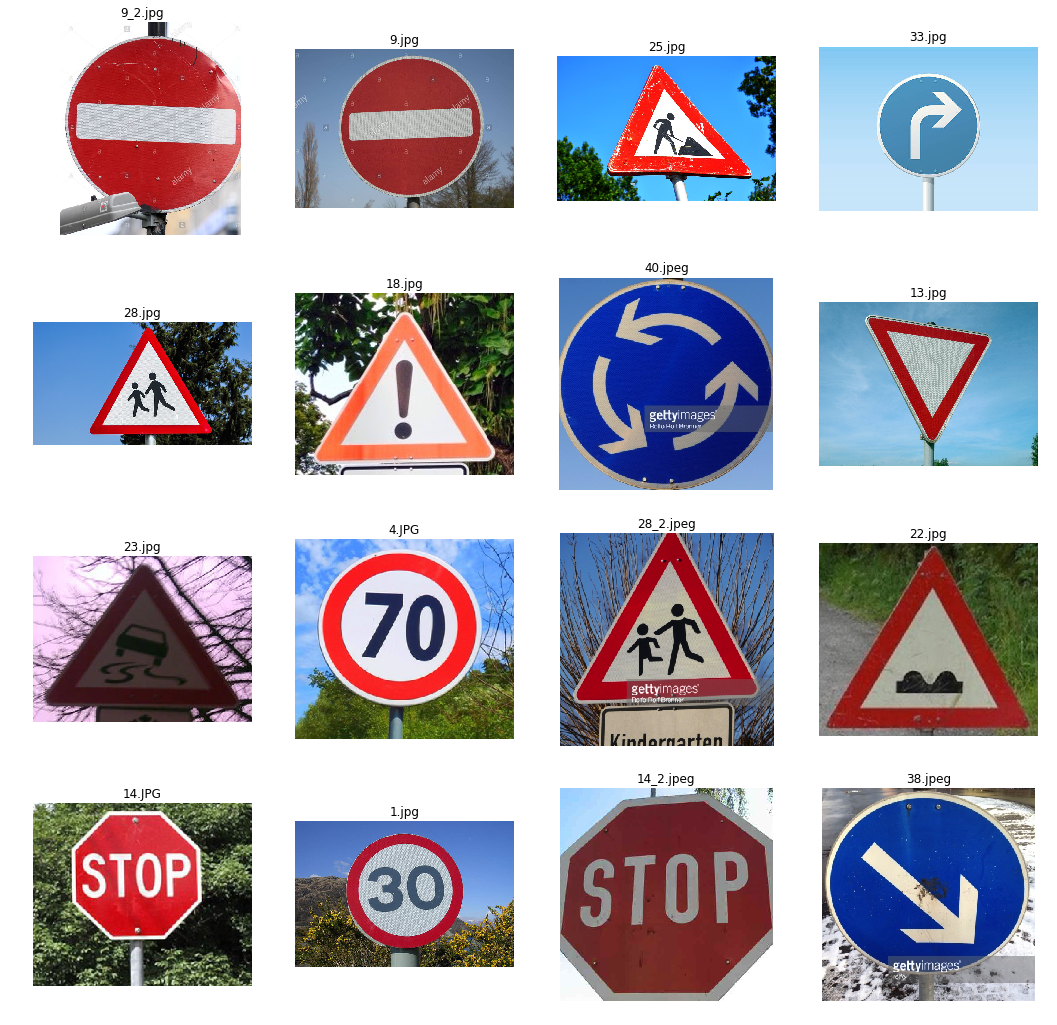

In [40]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg

internet_imgs = []
data_path = 'internet_data/'
fig = plt.figure(figsize=(18,18));
#true_internet_labels = np.array([])
true_internet_labels = []
n=0
for image in os.listdir(data_path):
    internet_img = str(data_path) + str(image)
    
    if internet_img == 'internet_data/.ipynb_checkpoints':
        pass
    else:
        img = mpimg.imread(internet_img)
        internet_imgs.append(img)
        image_label= image.split('.')
        image_label =image_label[0]
        
        try:
            true_internet_labels(int(image_label))
            
        except TypeError:
            image_label = image_label.split('_')
            image_label = image_label[0]
            true_internet_labels.append(int(image_label))
            
        
        n=n+1
        fig.add_subplot(4, 4, n)
        plt.title(str(image))#+": "+signname_plt)
        plt.axis('off')
        plt.imshow(img)

true_internet_labels = np.array(true_internet_labels)
print(true_internet_labels)

plt.show()


Because I'm curious about how the trained architecture would perform with internet data, I have added more than 5 images from the internet.
The NN should be able to handle this images. No qualities of the images that might make classification difficult

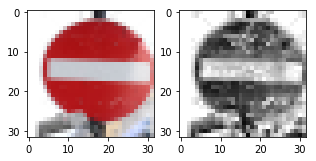

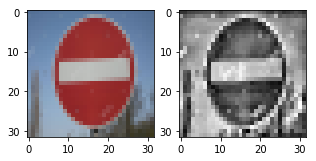

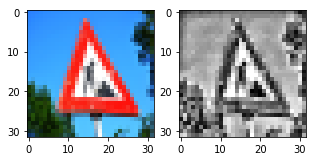

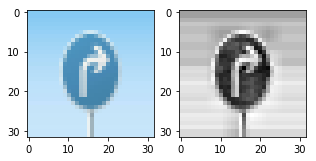

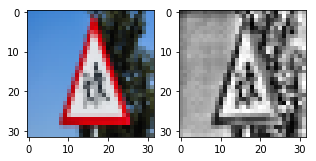

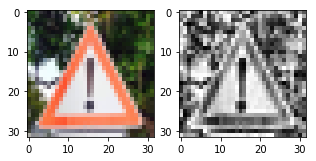

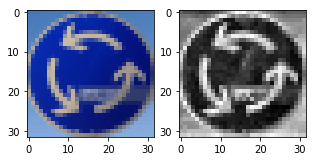

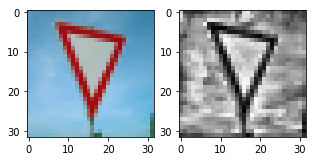

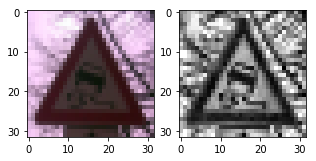

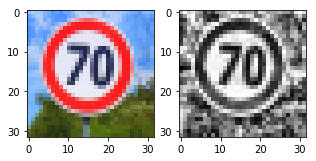

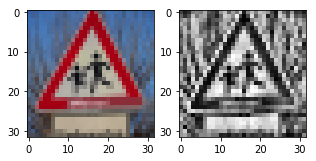

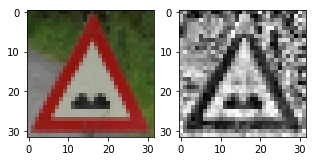

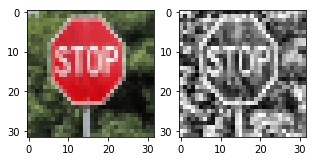

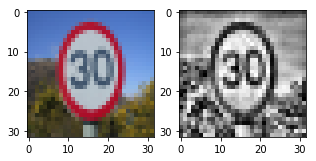

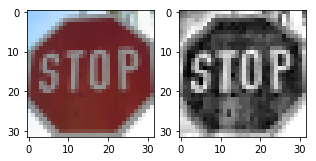

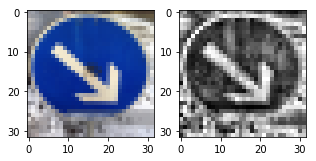

In [41]:
# resize the images
for img in internet_imgs:
    resized_image = cv2.resize(img, (32, 32),interpolation = cv2.INTER_AREA)
    prepro_internet_img = normalization(clahe(grayscale(resized_image)))
    fg, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,5))
    ax[0].imshow(resized_image)
    ax[1].imshow(prepro_internet_img, cmap='gray')

## Predict the Sign Type for Each Image
### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [42]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
def sign_predict(X_test, top_k=5):
    '''will return the values and indices (class ids) of the top k predictions. 
    So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) 
    and the correspoding class ids.'''
    n_signs = len(X_test)
    top_k_val = np.zeros((n_signs, top_k), dtype=np.int32) # top k values
    top_k_ind = np.zeros((n_signs, top_k)) # top k indices

    sm_top_5 = tf.nn.top_k(tf.nn.softmax(logits), k=top_k, sorted=True)
    with tf.Session() as sess:
        saver.restore(sess, './lenet')
        top_k_ind, top_k_val = sess.run(sm_top_5, feed_dict={x:X_test, keep_prob:1.0})
    return top_k_ind, top_k_val

In [43]:
# PIPELINE prediction

list_internet_labels = [] #labels
list_internet_preds = [] #predictions
list_internet_probs = [] #Probabilities
for img in internet_imgs:
    # 1. Reszising
    resized_image = cv2.resize(img, (32, 32), interpolation=cv2.INTER_NEAREST)
    # 2. pre-processing
    processed_img = normalization(clahe(grayscale(resized_image)))
    # 3. reshapeing
    reshaped_img = np.reshape(processed_img, (-1, 32, 32, 1))
    # 4. predicting 
    probabilities, predictions = sign_predict(reshaped_img, 5)
    #print(np.ndarray.flatten(predictions))
    #print(np.ndarray.flatten(probabilities))
    list_internet_preds.append(np.ndarray.flatten(predictions))
    labels = []
    for pred in np.ndarray.flatten(predictions):
        labels.append(signnames[str(pred)])
    list_internet_labels.append(labels)
    list_internet_probs.append(np.ndarray.flatten(probabilities))

INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [44]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def plot_top5_softmax(images, list_labels, list_probabilities, fig_size=(20, 35)):
    ''' plot the top five softmax probabilities for the predictions'''
    rows = len(images)
    fg, ax = plt.subplots(nrows=rows, ncols=2, figsize=fig_size)
    for n, prob_lb in enumerate(list_labels):
        img = images[n]
        ax[n,0].imshow(img)

        y_pos = np.arange(len(prob_lb))
        for m in range(0, len(prob_lb)):
            if m == 0:
                color = 'green'
            else:
                color = 'red'
            ax[n, 1].barh(m, list_probabilities[n][m], color=color, label="{0}".format(prob_lb[m]))

        ax[n, 1].set_yticks(y_pos)
        ax[n, 1].set_yticklabels(prob_lb)
        ax[n, 1].invert_yaxis()
        ax[n, 1].set_xlabel('Class')
        ax[n, 1].set_title('Softmax')  
        
    
    #fg.tight_layout()
    plt.show()

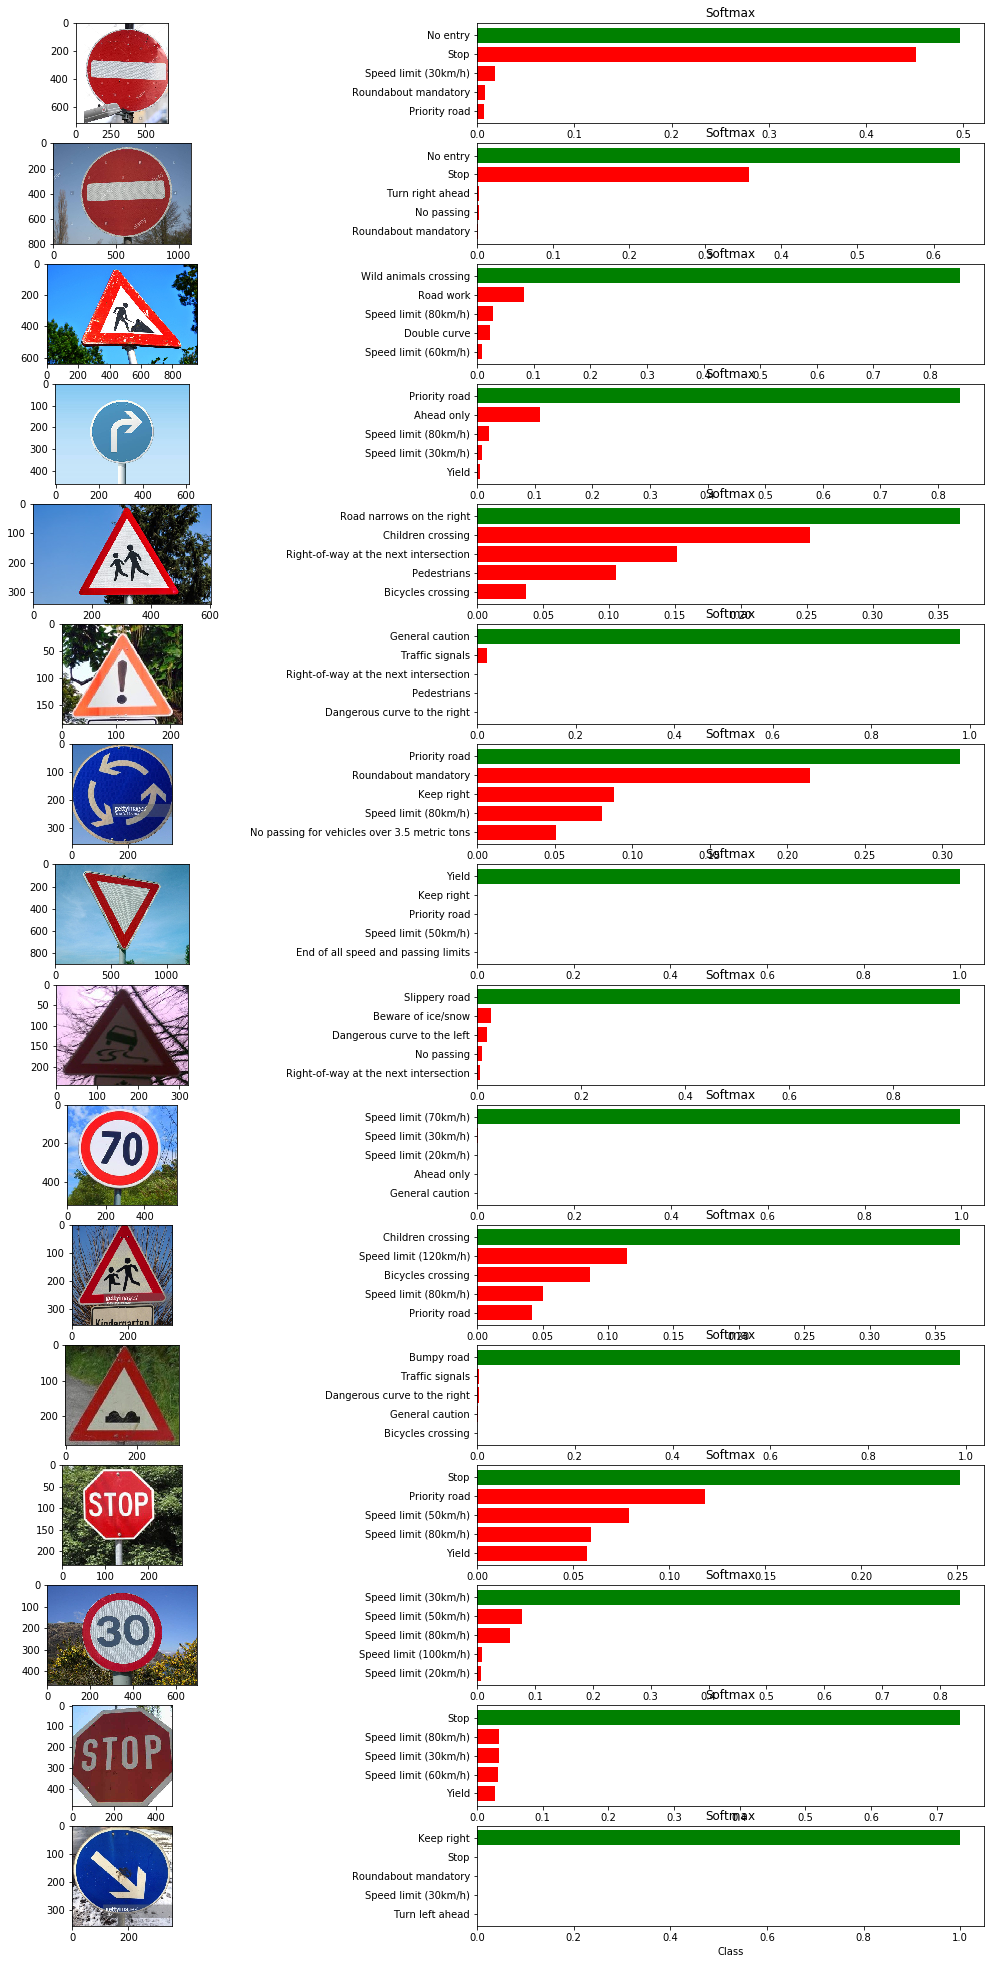

In [45]:
plot_top5_softmax(internet_imgs, list_internet_labels, list_internet_probs)

### Analyze Performance

In [46]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

internet_predictions = np.array(list_internet_preds)
pred_5 = 0  
pred_1 = 0
for i, pred in enumerate(internet_predictions):
    #print('i:'+str(i))
    #print('pred:'+str(pred))
    if true_internet_labels[i] in pred:
        pred_5 += 1
    if true_internet_labels[i] == pred[0]:
        pred_1 += 1
        
top5_pred = pred_5 / len(true_internet_labels) * 100
top1_pred = pred_1 / len(true_internet_labels) * 100

print('The accuracy of the top five predictions is:  %8.2f ' % (top5_pred))
print('The accuracy of the prediction with the highest softmax is: %8.2f ' % (top1_pred))

The accuracy of the top five predictions is:     87.50 
The accuracy of the prediction with the highest softmax is:    62.50 


My model is not able to perform equally well on captured internet pictures when compared to testing on the dataset. The reached accuracy is...

| Data         		|      accuracy	        					| 
|:---------------------:|:---------------------------------------------:| 
| top 5          		| 87.5 %   							| 
| top 1   	| 62.5% 	|

So in 87.5% the prediction of the top 5 traffic signs is correct. But only in 62.5% the highest probality of the model matches with the real sign type.



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [47]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(sess, image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [48]:
resized_img = cv2.resize(internet_imgs[1], (32, 32), interpolation=cv2.INTER_NEAREST)
processed_img = normalization(clahe(grayscale(resized_img)))
reshaped_img = np.reshape(processed_img, (-1, 32, 32, 1))

INFO:tensorflow:Restoring parameters from ./lenet


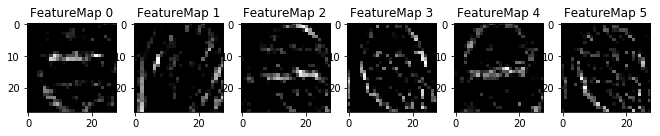

In [53]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap(sess, reshaped_img, network_params['conv1'])